In [1]:

import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp


import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst

from IPython.display import clear_output




# Importing Collider and Twiss
#-------------------------------------
collider = xt.Multiline.from_json('colliders/collider_NO_OCTU.json')
twiss = {}
twiss['lhcb1'] = collider['lhcb1'].twiss().to_pandas()
twiss['lhcb2'] = collider['lhcb2'].twiss().reverse().to_pandas()
#-------------------------------------


# Filtering twiss to get rid of slices, entries and exits
#-------------------------------------
light_twiss = {}
for sequence in ['lhcb1','lhcb2']:
    light_twiss[sequence] = xPlus.filter_twiss(twiss[sequence].set_index('name'),entries=['drift','..','_entry','_exit']).reset_index()
#-------------------------------------

clear_output()

---
# Loading tracking
---

In [6]:

import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp


import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst

from IPython.display import clear_output

# loading_dict={
partition_name    = 'TEST'
partition_ID      = 'BUNCH_0000_XPLANE_ZETA_0'
data_path         = 'tracking/coupling_study/DATA'
checkpoint_path   = 'tracking/coupling_study/CHECKPOINTS'
# turn_b_turn_path  = 'tracking/coupling_study/FULL/TEST_X_ONLY_V2'
data        = xPlus.Tracking_Interface.from_parquet(data_path         ,partition_name=partition_name,partition_ID=partition_ID)
_cpt        = xPlus.Tracking_Interface.from_parquet(checkpoint_path   ,partition_name=partition_name,partition_ID=partition_ID)
# _trk        = xPlus.Tracking_Interface.from_parquet(turn_b_turn_path  ,partition_name='CHUNK')

data._checkpoint = _cpt._checkpoint
# data._df = _trk._df
data

╭──────────────────────────── Tracking_Interface ────────────────────────────╮
│ ╭────────────────────────────────────────────────────────────────────────╮ │
│ │ <BBStudies.Tracking.XsuitePlus.RenderingTracker object at 0x17f8d5510> │ │
│ ╰────────────────────────────────────────────────────────────────────────╯ │
│                                                                            │
│   context_name = 'ContextCupy'                                             │
│      exec_time = 1217.981605547946                                         │
│         method = '6d'                                                      │
│     monitor_at = 'tcp.c6l7.b1'                                             │
│        n_parts = 19966                                                     │
│        n_turns = 10000                                                     │
│       nemitt_x = 1.8e-06                                                   │
│       nemitt_y = 1.8e-06                                                   │
│    nemitt_zeta = 2.5190102448834635                                        │
│   parquet_data = '_data'                                                   │
│ particle_on_co = "<class 'xpart.particles.particles.Particles'>"           │
│   partition_ID = 'BUNCH_0000_XPLANE_ZETA_0'                                │
│ partition_name = 'TEST'                                                    │
│        sigma_z = 0.09                                                      │
│  start_at_turn = 0                                                         │
│   stop_at_turn = 10000                                                     │
╰────────────────────────────────────────────────────────────────────────────╯

In [5]:
# data.sig_x_coll
self = data
coll_opening = 5
coll_x = coll_opening*self.sig_x_coll
coll_y = coll_opening*self.sig_y_coll
coll_s = np.sqrt((coll_x*np.cos(self.coll_alpha))**2 + (coll_y*np.sin(self.coll_alpha))**2)

sig_s = np.sqrt((self.sig_x_coll*np.cos(self.coll_alpha))**2 + (self.sig_y_coll*np.sin(self.coll_alpha))**2)
coll_s,coll_opening*sig_s

(0.00109750926589855, 0.00109750926589855)

In [4]:
collider['lhcb1'].element_names.index(data.monitor_at)

36806

(-7.0, 7.0)

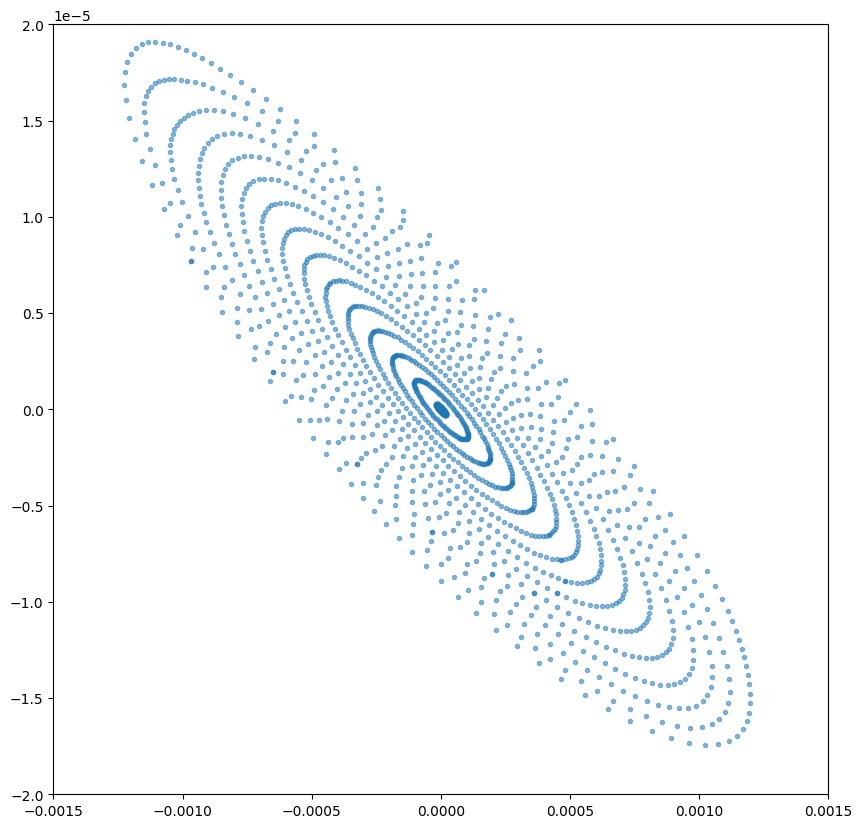

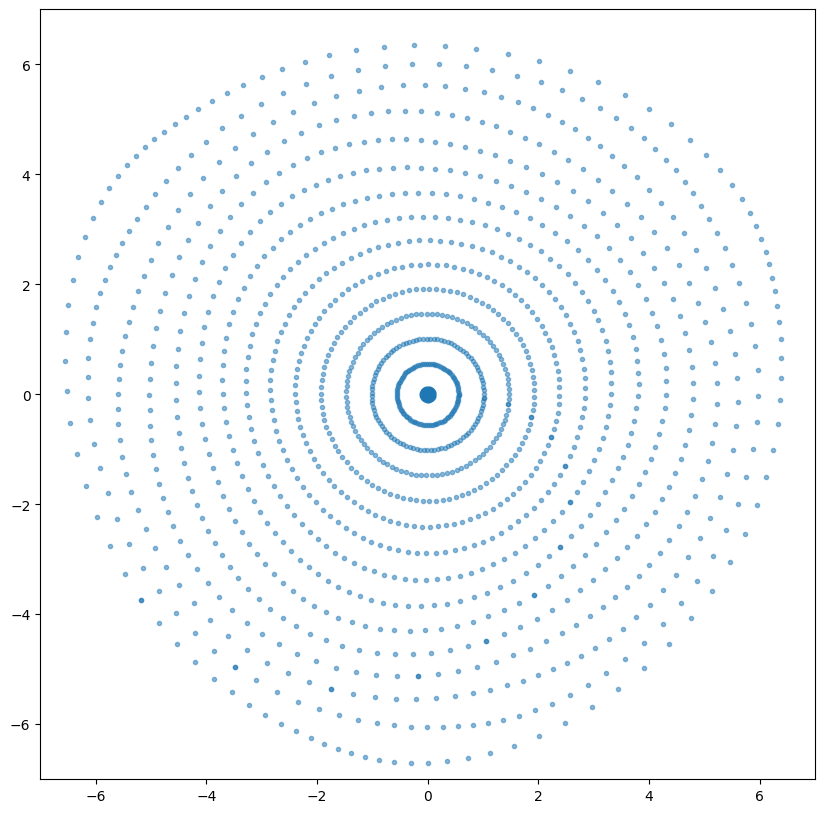

In [7]:
import matplotlib.pyplot as plt
CHUNK = 4 

df     = data.checkpoint.groupby('Chunk ID').get_group(CHUNK)
df_sig = data.checkpoint_sig.groupby('Chunk ID').get_group(CHUNK)
plt.figure(figsize=(10,10))
plt.plot(df.x,df.px,'.',alpha=0.5)
plt.xlim(-1.5e-3,1.5e-3)
plt.ylim(-2e-5,2e-5)


plt.figure(figsize=(10,10))
plt.plot(df_sig.x_sig,df_sig.px_sig,'.',alpha=0.5)
plt.xlim(-7,7)
plt.ylim(-7,7)

array([   5,   21,   37,   53,   69,   85,  101,  117,  133,  149,  165,
        181,  197,  213,  229,  245,  261,  277,  293,  309,  325,  341,
        357,  373,  389,  405,  421,  437,  453,  469,  485,  501,  517,
        533,  549,  565,  581,  597,  613,  629,  645,  661,  677,  693,
        709,  725,  741,  757,  773,  789,  805,  821,  837,  853,  869,
        885,  901,  917,  933,  949,  965,  981,  997, 1013, 1029, 1045,
       1061, 1077, 1093, 1109, 1125, 1141, 1157, 1173, 1189, 1205, 1221,
       1237, 1253, 1269, 1285, 1301, 1317, 1333, 1349, 1365, 1381, 1397,
       1413, 1429, 1445, 1461, 1477, 1493, 1509, 1525, 1541, 1557, 1573,
       1589,  212,  228,  244,  342,  358,  374,  391,  407,  423,  439,
        455,  471,  487,  518,  534,  628,  644,  660, 1012, 1028, 1044,
       1142, 1158, 1191, 1207, 1223, 1239, 1255, 1271, 1287, 1302, 1318,
       1428, 1444, 1460,  996])

Text(0, 0.5, 'action x')

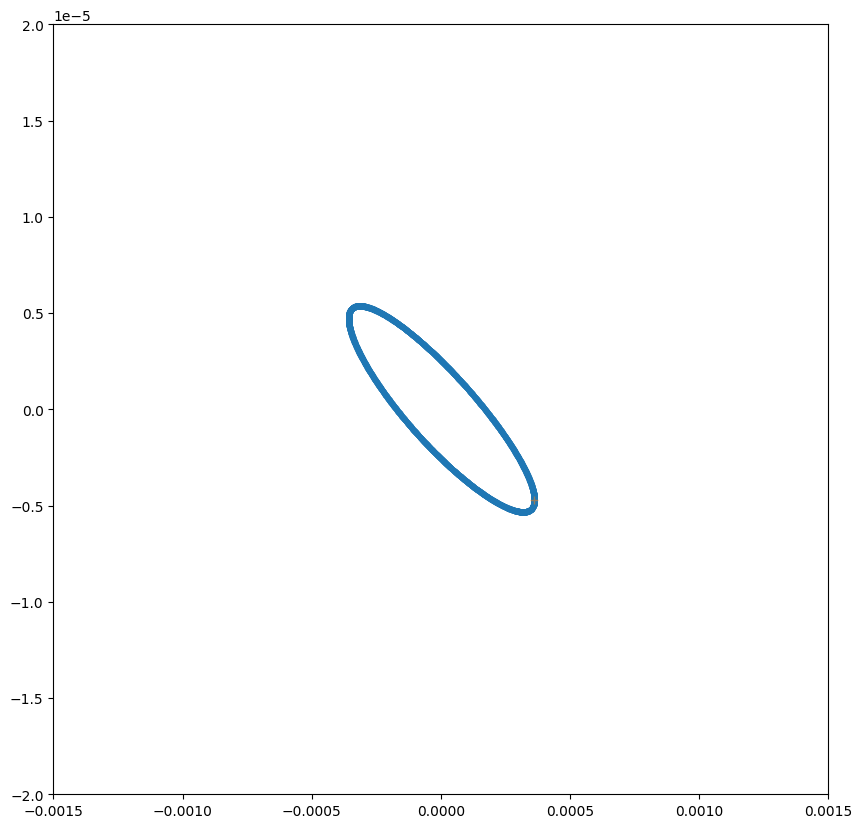

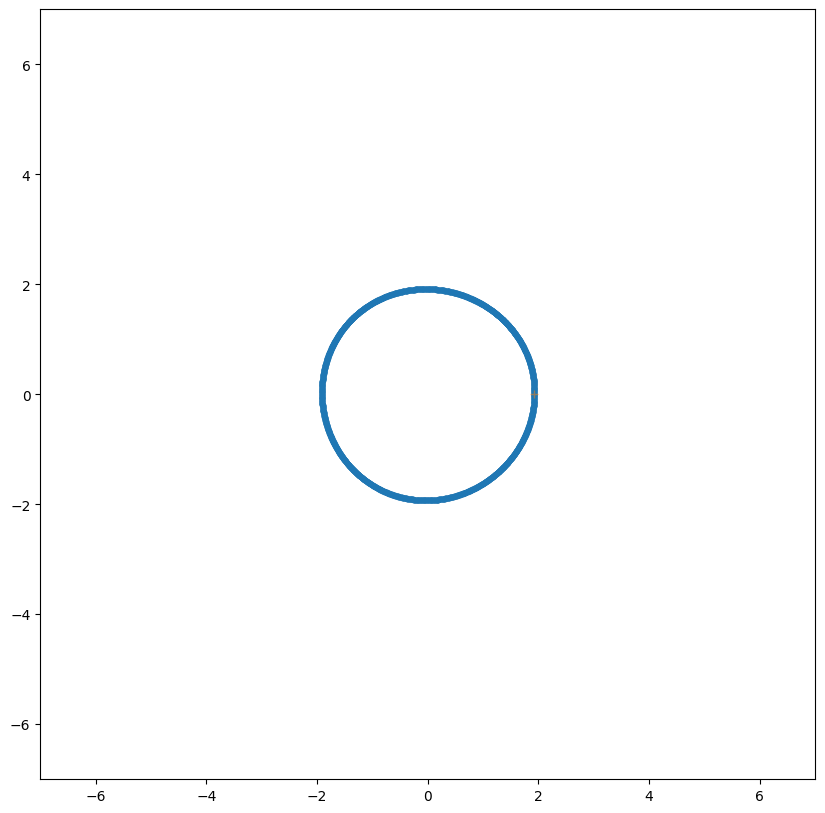

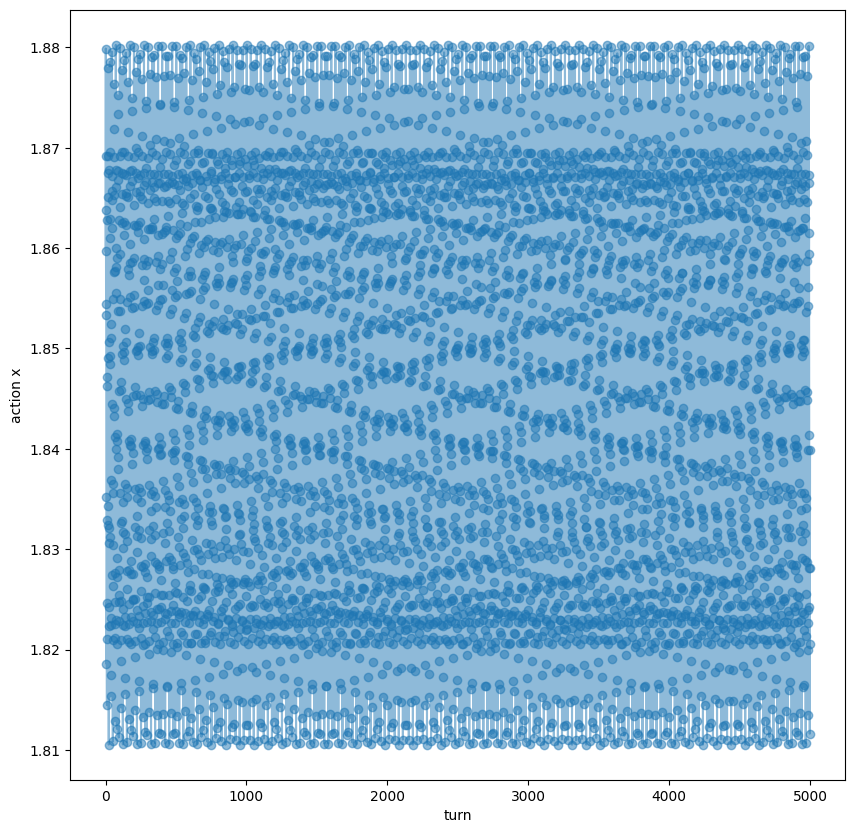

In [6]:
import matplotlib.pyplot as plt

part_list = data.checkpoint_sig[np.abs(data.checkpoint_sig.x_sig**2+data.checkpoint_sig.px_sig**2 - 3.5)<=0.5].particle.unique()
PART = part_list[0]

df     = data.df.groupby('particle').get_group(PART)
df_sig = data.df_sig.groupby('particle').get_group(PART)
c0     = data.coord.groupby('particle').get_group(PART)
c0_sig = data.coord_sig.groupby('particle').get_group(PART)
plt.figure(figsize=(10,10))
plt.plot(df.x,df.px,'.',alpha=0.5)
plt.plot(c0.x,c0.px,'+',alpha=0.5)
plt.xlim(-1.5e-3,1.5e-3)
plt.ylim(-2e-5,2e-5)


plt.figure(figsize=(10,10))
plt.plot(df_sig.x_sig,df_sig.px_sig,'.',alpha=0.5)
plt.plot(c0_sig.x_sig,c0_sig.px_sig,'+',alpha=0.5)
plt.xlim(-7,7)
plt.ylim(-7,7)

plt.figure(figsize=(10,10))
plt.plot(df.turn,0.5*(df_sig.x_sig**2+df_sig.px_sig**2),'-',alpha=0.5)
plt.plot(df.turn,0.5*(df_sig.x_sig**2+df_sig.px_sig**2),'o',alpha=0.5,color='C0')
plt.xlabel('turn')
plt.ylabel('action x')
# plt.plot(df.turn,0.5*(df_sig.x_sig**2+df_sig.px_sig**2),'.',alpha=0.5)
# plt.plot(c0_sig.x_sig,c0_sig.px_sig,'+',alpha=0.5)
# plt.xlim(-7,7)
# plt.ylim(-7,7)

In [38]:
particles

NameError: name 'particles' is not defined

In [5]:
df

,CHUNK,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
21000,0,0,21,0.000361,-4.562866e-06,1.609577e-07,-1.022368e-11,0.000003,0.000002,1,0
21001,0,1,21,-0.000115,-9.198906e-07,1.851334e-07,-6.183548e-11,0.000001,0.000002,1,0
21002,0,2,21,-0.000276,5.271084e-06,1.200397e-07,-8.674438e-10,0.000003,0.000002,1,0
21003,0,3,21,0.000318,-2.946706e-06,1.341964e-07,2.614991e-10,0.000004,0.000002,1,0
21004,0,4,21,0.000039,-3.047270e-06,2.497440e-07,7.264603e-10,0.000002,0.000002,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6421995,4,4995,21,-0.000355,4.421455e-06,1.046368e-07,-2.111031e-09,0.000006,0.000002,1,0
6421996,4,4996,21,0.000098,1.155130e-06,1.114663e-07,1.930320e-10,0.000007,0.000002,1,0
6421997,4,4997,21,0.000283,-5.245705e-06,2.401202e-07,1.071814e-09,0.000005,0.000002,1,0
6421998,4,4998,21,-0.000307,2.721427e-06,1.084971e-07,-1.598797e-09,0.000005,0.000002,1,0


In [4]:
twiss_at_TCP = twiss['lhcb1'].set_index('name').loc[data.monitor_at]
print(f'TWISS (x,px): ({twiss_at_TCP.x:.3e},{twiss_at_TCP.px:.3e})')
print(f'COORD (x,px): ({data.coord.x.mean():.3e},{data.coord.px.mean():.3e})')

TWISS (x,px): (8.489e-07,-1.117e-08)
COORD (x,px): (6.639e-06,-8.694e-08)
